In [219]:
# -*- coding: utf-8 -*-
# 读取excel文件
import pandas as pd
#训练集是在原训练集的基础上对ID、特征和Value值进行去重处理，去除了6个样本
original_data = pd.read_excel("训练_20180117.xlsx", index_col="ID")
testa_data = pd.read_excel("测试A_20180117.xlsx", index_col="ID")
testb_data = pd.read_excel("测试B_20180117.xlsx", index_col="ID")

In [222]:
#利用选取出的特征进行模型训练和预测
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
original_data = original_data.drop(["NH1835"],axis=0)
testa_data_result = pd.read_csv("[new] fusai_answer_a_20180127.csv", index_col="ID")
train_data_result = pd.concat([original_data["Value"], testa_data_result["Value"]],axis=0)
original_data_feature = original_data[['TOOL', '210X1', '210X2', '210X3', '210X4', '210X7', '210X14', '210X24', '210X36', '210X52', '210X81', '210X82', '210X143', '210X159', '210X174', '210X180', '210X188', '210X206', 'ERROR:#N/A_4', '220X3', '220X32', '220X54', '220X166', '310X151', '310X153', '311X52', '311X53', '311X87', '311X182', '311X183', '311X189', '311X211', '312X51', '312X57', '312X552', '312X553', '312X777', '340X11', '340X18', '340X109', '360X115', '360X157', '360X447', '360X582', '360X595', '360X645', '360X712', '420X99', '420X187', '420X188', '420X205', '420X211', '420X213', '420X216', '440AX2', '440AX112', '440AX148', '520X8', '520X177', '750X261', '750X335', '750X368', '750X621', '750X1083']]
testa_data_feature = testa_data[['TOOL', '210X1', '210X2', '210X3', '210X4', '210X7', '210X14', '210X24', '210X36', '210X52', '210X81', '210X82', '210X143', '210X159', '210X174', '210X180', '210X188', '210X206', 'ERROR:#N/A_4', '220X3', '220X32', '220X54', '220X166', '310X151', '310X153', '311X52', '311X53', '311X87', '311X182', '311X183', '311X189', '311X211', '312X51', '312X57', '312X552', '312X553', '312X777', '340X11', '340X18', '340X109', '360X115', '360X157', '360X447', '360X582', '360X595', '360X645', '360X712', '420X99', '420X187', '420X188', '420X205', '420X211', '420X213', '420X216', '440AX2', '440AX112', '440AX148', '520X8', '520X177', '750X261', '750X335', '750X368', '750X621', '750X1083']]
testb_data_feature = testb_data[['TOOL', '210X1', '210X2', '210X3', '210X4', '210X7', '210X14', '210X24', '210X36', '210X52', '210X81', '210X82', '210X143', '210X159', '210X174', '210X180', '210X188', '210X206', 'ERROR:#N/A_4', '220X3', '220X32', '220X54', '220X166', '310X151', '310X153', '311X52', '311X53', '311X87', '311X182', '311X183', '311X189', '311X211', '312X51', '312X57', '312X552', '312X553', '312X777', '340X11', '340X18', '340X109', '360X115', '360X157', '360X447', '360X582', '360X595', '360X645', '360X712', '420X99', '420X187', '420X188', '420X205', '420X211', '420X213', '420X216', '440AX2', '440AX112', '440AX148', '520X8', '520X177', '750X261', '750X335', '750X368', '750X621', '750X1083']]
#一定要将训练集和测试集的特征结合起来之后，进行统一的后续处理，包括文字特征、缺失值和标准化等。
all_feature = pd.concat([original_data_feature, testa_data_feature, testb_data_feature], axis=0)
encoder = LabelEncoder()
all_feature["TOOL"] = encoder.fit_transform(all_feature["TOOL"])
#使用中位数填充特征数据中的缺失值
for column in all_feature.columns:
    median = all_feature[column].median()
    all_feature[column] = all_feature[column].fillna(median)
#将所有数据的特征列进行伸缩处理，使得各个列的值大小在一个维度上
scale = StandardScaler()
temp = scale.fit_transform(all_feature)
all_feature = pd.DataFrame(temp, index=all_feature.index, columns=all_feature.columns)
train_data_feature = all_feature.iloc[0:1093]
testb_data_feature = all_feature.iloc[1093:1505]

original_x = train_data_feature
original_y = train_data_result
# x_train = original_x.iloc[0:709]
# x_verification = original_x.iloc[709:1062]
# y_train = original_y.iloc[0:709]
# y_verification = original_y.iloc[709:1062]
# seeds = [7, 10, 20, 30, 40, 42]
test_size = 0.375
seed = 42
x_train, x_verification, y_train, y_verification = train_test_split(original_x, original_y, test_size=test_size, random_state=seed)
model = GradientBoostingRegressor(max_depth=4, learning_rate=0.1, n_estimators=200)
# model.fit(x_train, y_train)
model.fit(original_x, original_y)
y_verification_pred = model.predict(x_verification)
evaluation_result = mean_squared_error(y_verification, y_verification_pred)
print(evaluation_result)

# model = GradientBoostingRegressor()
# parameter_grid = [{"max_depth":[4], "learning_rate": [0.10], "n_estimators": [195, 200, 205]}]
# grid_search = GridSearchCV(model, parameter_grid, cv=3, scoring="neg_mean_squared_error")
# grid_search.fit(original_x, original_y)
# print(grid_search.best_params_)
# print(grid_search.best_score_)
# print(grid_search.best_index_)
# grid_search_result = grid_search.cv_results_
# for score, params in zip(grid_search_result["mean_test_score"], grid_search_result["params"]):
#     print(score, params)
# print(grid_search_result["split0_test_score"])
# print(grid_search_result["split1_test_score"])
# print(grid_search_result["split2_test_score"])

x_test = testb_data_feature
y_test_pred = model.predict(x_test)
y_test_pred_dataframe = pd.DataFrame({"result": y_test_pred}, index=x_test.index)
y_test_pred_dataframe.to_csv("resultb_gbdt_new5_200.csv", header=False)

0.000818449432541


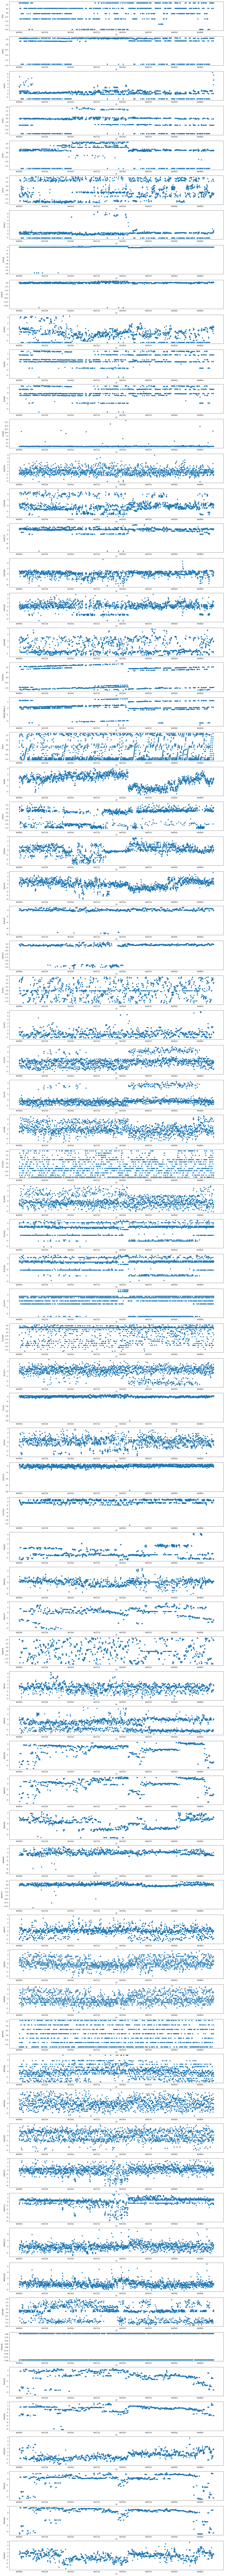

In [160]:
#对处理之后的特征每一列画一个散点图，查看有没有异常值。
from matplotlib import pyplot
pyplot.rcParams["figure.figsize"] = [24, 296]
# all_feature.loc["NH1025"].iloc[0].plot(style="o")
# all_feature.loc["NH1025"].iloc[1].plot(style="o")
i = 1
for column in all_feature.columns:
    pyplot.subplot(74, 1, i)
    all_feature[column].plot(style="o")
    pyplot.ylabel(column)
    i += 1
pyplot.show()

In [165]:
#临时代码块
m = pd.DataFrame({"a":[1,2,1,2,4,6],"b":[3,4,5,10,6,7]})
print(m)
m = m.drop_duplicates(subset=["a"])
print(m)

   a   b
0  1   3
1  2   4
2  1   5
3  2  10
4  4   6
5  6   7
   a  b
0  1  3
1  2  4
4  4  6
5  6  7
